In [3]:
import cvxpy as cp
import numpy as np

Here, we solve the following LPP:
$$\begin{matrix} \displaystyle \min_{x_1,\ x_2} & z=-250000x_1-180000x_2 \\
\text{subject to } & 12x_1+9x_2 \leq 900\\
&   0\geq x_1 \leq 45\\ & 0\geq x_2 \leq 80\end{matrix}$$

In [9]:
x = cp.Variable(2)

constraints = [12*x[0] + 9*x[1] <= 900, x[0]<=45, x[1]<=80, x>=0]
objective = cp.Minimize(-250000*x[0] - 180000*x[1])
problem = cp.Problem(objective, constraints)

solution = problem.solve()
print(np.abs(solution.round(2)))
print(x.value.round(2))


18450000.0
[45. 40.]


In [8]:
x = cp.Variable(2)

constraints = [12*x[0] + 9*x[1] <= 900, x[0]<=45, x[1]<=80, x>=0]
objective = cp.Maximize(250000*x[0] + 180000*x[1])
problem = cp.Problem(objective, constraints)

solution = problem.solve()
print(solution.round(2))
print(x.value.round(2))

18450000.0
[45. 40.]


## 

In [11]:
pip install autograd

Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
# Ma trận A và vector b
A = np.array([[1, 0],
              [0, -2]])
b = np.array([2, 4])

In [21]:
from scipy.optimize import minimize
res = minimize(f, x0=np.array([-3.0, 5.0]), jac=grad_f, method='BFGS')
x_star = res.x
f_star = res.fun
print(f"\nĐiểm tối ưu x* = {x_star.round(2)}, f* = {f_star:.6f}")


Điểm tối ưu x* = [ 0. -2.], f* = 3.000000


In [15]:
# --- Tìm giá trị tối ưu f* ---
# Vì f(x) = e^{2x1} + 1/2[(x1-2)^2 + (-2x2-4)^2]
# => x1* = 0 (vì e^{2x1} + 0.5(x1-2)^2 có nghiệm ~0)
# => x2* = -2
def f(x):
    return np.exp(2 * x[0]) + 0.5 * np.linalg.norm(A @ x - b)**2
    
x_star = np.array([0, -2])
f_star = f(x_star)
print(f"\nĐiểm tối ưu x* = {x_star}, f* = {f_star:.6f}")


Điểm tối ưu x* = [ 0 -2], f* = 3.000000


In [17]:
import autograd.numpy as np
from autograd import grad
# Gradient của f(x)
grad_f = grad(f) 
    
# Gradient descent
def gradient_descent(learning_rate, max_iter, x0):
    x = x0.copy()
    x_values = [x.copy()]
    f_values = [f(x)]
    
    for k in range(max_iter):
        g = grad_f(x)
        x = x - learning_rate * g
        x_values.append(x.copy())
        f_values.append(f(x))
        print(f"Lần lặp {k+1}: x = {x}, f(x) = {f(x):.6f}")
    return x_values, f_values

# --- Khởi tạo ---
x0 = np.array([-3.0, 5.0])
max_iter = 100
learning_rates = [2/5, 1/2]

# --- Chạy cho từng learning rate ---
results = {}
for lr in learning_rates:
    print(f"\n==== Learning rate = {lr} ====")
    x_vals, f_vals = gradient_descent(lr, max_iter, x0)
    results[lr] = (x_vals, f_vals)


==== Learning rate = 0.4 ====
Lần lặp 1: x = [-1.001983 -6.2     ], f(x) = 39.920751
Lần lặp 2: x = [0.09097051 0.52      ], f(x) = 15.722540
Lần lặp 3: x = [-0.10505245 -3.512     ], f(x) = 7.598410
Lần lặp 4: x = [ 0.08856916 -1.0928    ], f(x) = 4.666604
Lần lặp 5: x = [-0.10189547 -2.54432   ], f(x) = 3.617184
Lần lặp 6: x = [ 0.08635642 -1.673408  ], f(x) = 3.232865
Lần lặp 7: x = [-0.09900595 -2.1959552 ], f(x) = 3.100070
Lần lặp 8: x = [ 0.08430836 -1.88242688], f(x) = 3.046250
Lần lặp 9: x = [-0.09634809 -2.07054387], f(x) = 3.032023
Lần lặp 10: x = [ 0.08240514 -1.95767368], f(x) = 3.021337
Lần lặp 11: x = [-0.09389242 -2.02539579], f(x) = 3.022276
Lần lặp 12: x = [ 0.08063014 -1.98476252], f(x) = 3.017445
Lần lặp 13: x = [-0.09161452 -2.00914249], f(x) = 3.020170
Lần lặp 14: x = [ 0.07896934 -1.99451451], f(x) = 3.016334
Lần lặp 15: x = [-0.0894939  -2.00329129], f(x) = 3.019130
Lần lặp 16: x = [ 0.07741078 -1.99802522], f(x) = 3.015632
Lần lặp 17: x = [-0.08751323 -2.001184

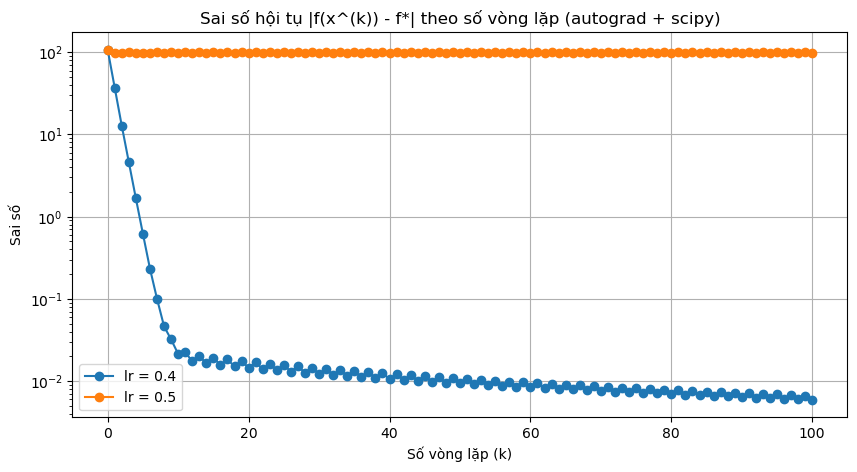

In [22]:
plt.figure(figsize=(10,5))
for lr in learning_rates:
    errors = np.abs(results[lr][1] - f_star)
    plt.plot(errors, marker='o', label=f'lr = {lr}')
plt.title("Sai số hội tụ |f(x^(k)) - f*| theo số vòng lặp (autograd + scipy)")
plt.xlabel("Số vòng lặp (k)")
plt.ylabel("Sai số")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.show()

LR = 0.4
Đánh giá: hội tụ chậm và nhấp nhô (oscillatory) về phía nghiệm. x₂ tiến về −2, x₁ cũng tiến về 0 nhưng vẫn chưa đến gần f*=1 sau 100 vòng.  
LR = 0.5  
Kết quả sau 100 vòng: chu kỳ dao động (không hội tụ ổn định). Ví dụ các giá trị đầu vài vòng là:
Kết luận: x₂ nhảy lặp lại giữa hai giá trị (5 và −9) → không hội tụ.
Giá trị hàm dao động lớn, ở khoảng ~100 (không tiến về 1).

## 

\
\begin{matrix}
\displaystyle \min_{x \in \mathbb{R}^n} & f(x) = c^T x - \sum_{i=1}^m \log(b_i - a_i^T x)
\end{matrix}

1. Tính \( \nabla f(x) \)
2. Tính \( \nabla^2 f(x) \)
3. Chứng minh rằng \( f \) là hàm lồi trên tập xác định của nó.




**Bước 1.**  
Tập xác định của \( f \) là:
$$
D = \{x \in \mathbb{R}^n \mid a_i^T x < b_i, \ \forall i = 1, 2, \ldots, m\}
$$

**Bước 2. Gradient:**
$$
\nabla f(x) = c - \sum_{i=1}^m \frac{a_i}{b_i - a_i^T x}
$$

**Bước 3. Hessian:**
$$
\nabla^2 f(x) = \sum_{i=1}^m \frac{a_i a_i^T}{(b_i - a_i^T x)^2}
$$

**Bước 4. Tính chất lồi:**

Vì mỗi hạng tử trong tổng
$$
\frac{a_i a_i^T}{(b_i - a_i^T x)^2}
$$
là **ma trận xác định dương bán phần**, nên tổng của chúng cũng là xác định dương bán phần.

Do đó:
$$
\nabla^2 f(x) \succeq 0 \quad \forall x \in D
$$

⟹ \( f(x) \) là **hàm lồi** trên tập xác định \( D \).|

In [50]:
# ======== (1) DỮ LIỆU BÀI TOÁN ========
A = np.array([
    [0, -2, -1, -2],
    [1, -1,  3,  0],
    [1, -1,  2, -5]
])
b = np.array([3, -1, 3, 2])
c = np.array([4, 11/4, 13/4])


Điểm tối ưu x* = [-1.37160486e+11 -2.10027000e+11 -9.00115737e+10]
Giá trị tối ưu p* = -1418753806617.13


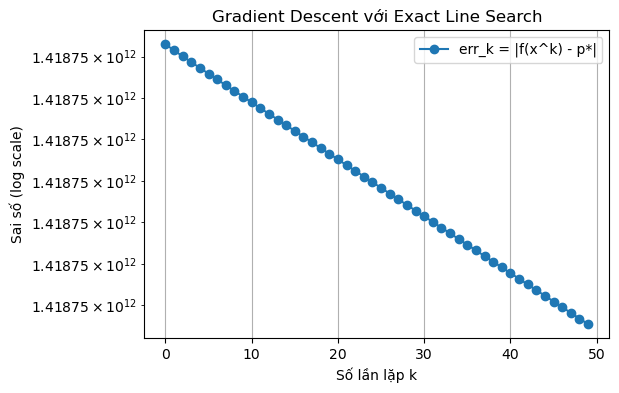

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar, minimize


# ===== Hàm f(x), ∇f(x) =====
def f(x):
    value = c[0]*x[0] + c[1]*x[1] + c[2]*x[2]
    for i in range(4):  # m = 4
        ai = A[:, i]
        val = b[i] - np.dot(ai, x)
        if val > 0:
            value -= np.log(val)
        else:
            value -= 0  # bỏ qua nếu log âm hoặc 0
    return value

def grad_f(x):
    grad = np.copy(c)
    for i in range(4):
        ai = A[:, i]
        val = b[i] - np.dot(ai, x)
        if val > 0:
            grad += ai / val
        # nếu val <= 0 thì bỏ qua (vì đạo hàm không xác định)
    return grad
# ===== Tìm x* và p* =====
x0 = np.zeros(3)
res = minimize(f, x0, method='BFGS')
x_star = res.x
p_star = f(x_star)

print("Điểm tối ưu x* =", x_star.round(2))
print("Giá trị tối ưu p* =", p_star.round(2))

# ===== Gradient Descent với Exact Line Search =====
def exact_line_search(x, grad):
    func = lambda alpha: f(x - alpha * grad)
    result = minimize_scalar(func, bounds=(0, 1), method='bounded')
    return result.x

x = np.array([-1, 1, 0], dtype=float)
max_iter = 50
errors = []

for k in range(max_iter):
    grad = grad_f(x)
    alpha = exact_line_search(x, grad)
    x = x - alpha * grad
    errors.append(abs(f(x) - p_star))

# ===== Vẽ đồ thị sai số =====
plt.figure(figsize=(6,4))
plt.semilogy(range(len(errors)), errors, 'o-', label='err_k = |f(x^k) - p*|')
plt.xlabel('Số lần lặp k')
plt.ylabel('Sai số (log scale)')
plt.title('Gradient Descent với Exact Line Search')
plt.legend()
plt.grid(True)
plt.show()
